In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
from pandas import DataFrame
import os,re
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# 사용자 운영체제 확인
import os
os.name
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

#Threshold 변수
Threshold = 6

#평균 변수
avg = 0.2

In [2]:
#읽어온 txt파일에서 [,],A,:문자 제거 함수
def clean_text(inputString):
    text_rmv = re.sub('[A: \n"』‘|\(\)\[\]`\'…》\”\“\’·]', '', inputString)
    make_list = text_rmv.split(',') # ,를 기준으로 리스트 분류
    return make_list

In [3]:
# 그래프 만들기 위한 x, y좌표 값 생성 함수
def data_graph(undefined_data):
    make_list = clean_text(undefined_data)
    y = make_list
    x = []
    num = 1
    for i in range(len(y)):
        #x_label = num * y
        x.append(num * step)
        num += 1
    return x,y

In [4]:
file_num = 0 #파일의 개수 확인
#폴더 안에 있는 파일수 함수
files = []
#root = "./openai-quickstart-python-master/대출사기형 저장 txt 0406"
root = "./Real-time Voice Phishing Detection/VP_train"
file_name = []
file_name = os.listdir(root) #파일 이름만 저장
step = 100 #몇개의 문자로 나눴는지 확인 변수

walk = [root]
while walk:
    folder = walk.pop(0)+"/"
    items = os.listdir(folder) # items = folders + files
    for i in items:
        file_num = file_num +1
        i=folder+i # 파일 경로와 파일이름 맵핑 리스트
        (walk if os.path.isdir(i) else files).append(i)
#print(files)
print(file_name)

['01)은행연합회사칭_보안카드탈취시도_ATM기 앞으로 유도.txt', '02)시티캐피탈사칭.txt', '03)금감원 은행조사관 사칭 명의도용 사건.txt', '04)취업빙자 통장편취사기.txt', '05)입출금 가능한 계좌 임대 요청 (한달에 300만원).txt', '104)(피해자가 의심하자) 고객님께서 OO캐시에.txt', '109).txt', '11)이벤트행사 통장 한개당 300만원 제안.txt', '112).txt', '113).txt', '12)통장 임대 요청 (한달 임대료 250만원 드려요).txt', '120).txt', '126).txt', '13)신용관리 명목으로 비용을 요구.txt', '130).txt', '132).txt', '137).txt', '138).txt', '139).txt', '141).txt', '15)전산상 대출 가능조건을 만든다는 명목으로 선입금을 요구.txt', '155).txt', '161).txt', '165).txt', '17)구직사이트를 통해 대포통장을 개설하는 아르바이트 모집1.txt', '19)탈세를 명목으로 하여 통장을 양도하도록 유도.txt', '22)[대출빙자형 3] 은행을 사칭하면서 서민금융나들목 상품 명목의 대출을 안내.txt', '24)[대출빙자형 5] 사금융 대환대출 명목으로 피해자의 무통장입금 유도.txt', '26)[대출빙자형 7] 편법을 통해 피해자 신용평점을 상향시키기 위한 대출상환 요구-ⓑ.txt', '28)[대출빙자형 9] ARS로 대출안내를 신청한 피해자에게 대출상품을 안내해 줄 것처럼 속임.txt', '29)신한금융 사칭 대출권유.txt', '36)경매대행 업체를 사칭하여 대포통장 및 인출책 모집.txt', '40)음성안내에 대해 대출상담을 신청하자 시중은행을 사칭.txt', '50).txt', '51)기존 대출을 반환하시면 됩니다.txt', '56).txt', '61).txt', '66)대출을 위해서 신분증 사본과 3개월치 입출금 거래내역서를 보내주셔야 합니다.txt', '81).

In [5]:
print(len(file_name))

40


In [6]:
x_axis = []
y_axis = []
#y_num = []
for i in range(len(files)):
    y_tmp = []
    if os.path.exists(files[i]):
        fr = open(files[i], "r", encoding='utf-8')
        lines = fr.read()
        x, y = data_graph(lines)
        fr.close()

        y_tmp = list(map(int, y))
        
        x_axis.append(x)
        y_axis.append(y_tmp)
        
#print(y_tmp)

In [7]:
voice_phishing = pd.DataFrame(y_axis, index = files)

#보이스 피싱 결측값 개수 step마다
voice_phishing_null = voice_phishing.isnull().sum()

In [8]:
print(len(y_axis))

40


In [9]:
print(y_axis[0]) #보이스 피싱 가능도 파일 내의 값들

[8, 8, 8, 8, 8, 8, 10, 10, 8, 10, 8, 8]


In [10]:
print(voice_phishing_null) #보이스 피싱 값들 중 step별로 빠져있는 값들의 합

0      0
1      0
2      0
3      1
4      3
      ..
80    39
81    39
82    39
83    39
84    39
Length: 85, dtype: int64


In [11]:
#보이스 피싱 내용중에 Threshold 6이상 개수 저장 리스트
voice_phishing_True = []
#보이스 피싱 내용중에 Threshold 6이하 개수 저장 리스트
voice_phishing_False = []
#보이스 피싱 1개 파일당 크기 저장 리스트
voice_phishing_denominator = []
#len(y_axis)
for i in range(len(y_axis)):
    over_Threshold = 0
    lower_Threshold = 0
    voice_phishing_denominator.append(len(y_axis[i]))
    
    for j in range(len(y_axis[i])):
        if Threshold <= y_axis[i][j]:
            over_Threshold += 1
        else:
            lower_Threshold += 1
    voice_phishing_True.append(over_Threshold)
    voice_phishing_False.append(lower_Threshold)
    
print(voice_phishing_True)
print(voice_phishing_False)
print(voice_phishing_denominator)

[12, 6, 11, 4, 2, 18, 7, 1, 6, 8, 1, 17, 3, 17, 8, 8, 6, 11, 8, 11, 12, 15, 5, 27, 6, 11, 9, 11, 24, 2, 4, 5, 4, 13, 6, 7, 3, 2, 6, 3]
[0, 2, 0, 12, 3, 30, 15, 2, 24, 15, 3, 68, 6, 10, 4, 22, 11, 15, 4, 36, 7, 1, 7, 0, 10, 9, 11, 16, 18, 6, 0, 3, 2, 32, 7, 9, 44, 4, 8, 17]
[12, 8, 11, 16, 5, 48, 22, 3, 30, 23, 4, 85, 9, 27, 12, 30, 17, 26, 12, 47, 19, 16, 12, 27, 16, 20, 20, 27, 42, 8, 4, 8, 6, 45, 13, 16, 47, 6, 14, 20]


In [12]:
print("보이스 피싱 알람이 울리지 않은 횟수: ", voice_phishing_False)
print("보이스 피싱 데이터 각각 전체 step: ", voice_phishing_denominator)

보이스 피싱 알람이 울리지 않은 횟수:  [0, 2, 0, 12, 3, 30, 15, 2, 24, 15, 3, 68, 6, 10, 4, 22, 11, 15, 4, 36, 7, 1, 7, 0, 10, 9, 11, 16, 18, 6, 0, 3, 2, 32, 7, 9, 44, 4, 8, 17]
보이스 피싱 데이터 각각 전체 step:  [12, 8, 11, 16, 5, 48, 22, 3, 30, 23, 4, 85, 9, 27, 12, 30, 17, 26, 12, 47, 19, 16, 12, 27, 16, 20, 20, 27, 42, 8, 4, 8, 6, 45, 13, 16, 47, 6, 14, 20]


In [13]:
df = pd.DataFrame({"파일 이름" : file_name,
                 "보이스 피싱 알람이 울리지 않은 횟수" : voice_phishing_False,
                 "보이스 피싱 데이터 각각 전체 step ": voice_phishing_denominator
                  })
df

,파일 이름,보이스 피싱 알람이 울리지 않은 횟수,보이스 피싱 데이터 각각 전체 step
0,01)은행연합회사칭_보안카드탈취시도_ATM기 앞으로 유도.txt,0,12
1,02)시티캐피탈사칭.txt,2,8
2,03)금감원 은행조사관 사칭 명의도용 사건.txt,0,11
3,04)취업빙자 통장편취사기.txt,12,16
4,05)입출금 가능한 계좌 임대 요청 (한달에 300만원).txt,3,5
5,104)(피해자가 의심하자) 고객님께서 OO캐시에.txt,30,48
6,109).txt,15,22
7,11)이벤트행사 통장 한개당 300만원 제안.txt,2,3
8,112).txt,24,30
9,113).txt,15,23


In [14]:
voice_phishing_confusion_matrix = []
true_voice_phishing_tmp = []
flase_voice_phishing_tmp = []
count_tmp = 0

voice_phishing_over50 = 0
voice_phishing_lower50 = 0
for i in range(len(y_axis)):
    cal = voice_phishing_True[i] / voice_phishing_denominator[i]
    if avg <= cal:
        voice_phishing_over50 += 1
        true_voice_phishing_tmp.append(file_name[count_tmp])
        count_tmp += 1
    else:
        voice_phishing_lower50 +=1
        flase_voice_phishing_tmp.append(file_name[count_tmp])
        count_tmp += 1
        
print(voice_phishing_over50) 
print(voice_phishing_lower50)
voice_phishing_confusion_matrix.append(voice_phishing_over50)
voice_phishing_confusion_matrix.append(voice_phishing_lower50)
print(voice_phishing_confusion_matrix)

38
2
[38, 2]


In [15]:
print("보이스 피싱으로 분류된 파일: ", true_voice_phishing_tmp)

보이스 피싱으로 분류된 파일:  ['01)은행연합회사칭_보안카드탈취시도_ATM기 앞으로 유도.txt', '02)시티캐피탈사칭.txt', '03)금감원 은행조사관 사칭 명의도용 사건.txt', '04)취업빙자 통장편취사기.txt', '05)입출금 가능한 계좌 임대 요청 (한달에 300만원).txt', '104)(피해자가 의심하자) 고객님께서 OO캐시에.txt', '109).txt', '11)이벤트행사 통장 한개당 300만원 제안.txt', '112).txt', '113).txt', '12)통장 임대 요청 (한달 임대료 250만원 드려요).txt', '120).txt', '126).txt', '13)신용관리 명목으로 비용을 요구.txt', '130).txt', '132).txt', '137).txt', '138).txt', '139).txt', '141).txt', '15)전산상 대출 가능조건을 만든다는 명목으로 선입금을 요구.txt', '155).txt', '161).txt', '165).txt', '17)구직사이트를 통해 대포통장을 개설하는 아르바이트 모집1.txt', '19)탈세를 명목으로 하여 통장을 양도하도록 유도.txt', '22)[대출빙자형 3] 은행을 사칭하면서 서민금융나들목 상품 명목의 대출을 안내.txt', '24)[대출빙자형 5] 사금융 대환대출 명목으로 피해자의 무통장입금 유도.txt', '26)[대출빙자형 7] 편법을 통해 피해자 신용평점을 상향시키기 위한 대출상환 요구-ⓑ.txt', '28)[대출빙자형 9] ARS로 대출안내를 신청한 피해자에게 대출상품을 안내해 줄 것처럼 속임.txt', '29)신한금융 사칭 대출권유.txt', '36)경매대행 업체를 사칭하여 대포통장 및 인출책 모집.txt', '40)음성안내에 대해 대출상담을 신청하자 시중은행을 사칭.txt', '50).txt', '51)기존 대출을 반환하시면 됩니다.txt', '56).txt', '66)대출을 위해서 신분증 사본과 3개월치 입출금 거래내역서를 보내주셔야 합니다.txt'

In [16]:
print("일반대화로 분류된 파일: ", flase_voice_phishing_tmp)

일반대화로 분류된 파일:  ['61).txt', '84)고객님께서 저희 OO캐피탈로부터 대출을 받는다는 녹취를 진행하도록 하겠습니다. 동 내용으로 인해 유출 등의 문제 발생시 금감원에 손해배상청구소송을 진행하실 수 있습니다.txt']


In [17]:
#보이스 피싱 결측값 개수 step마다
print(len(voice_phishing_null[0:20]))

20


In [18]:
file_num = 0 #파일의 개수 확인
#폴더 안에 있는 파일수 함수
files = []
#root = "./openai-quickstart-python-master/일반대화 저장 txt 0406"
root = "./Real-time Voice Phishing Detection/NonVP_train"
file_name = []
file_name = os.listdir(root) #파일 이름만 저장
step = 100 #몇개의 문자로 나눴는지 확인 변수

walk = [root]
while walk:
    folder = walk.pop(0)+"/"
    items = os.listdir(folder) # items = folders + files
    for i in items:
        file_num = file_num +1
        i=folder+i # 파일 경로와 파일이름 맵핑 리스트
        (walk if os.path.isdir(i) else files).append(i)
#print(files)
print(file_name)

['01.txt', '02.txt', '03.txt', '04.txt', '05.txt', '11.txt', '14.txt', '15.txt', '17.txt', '18.txt', '20.txt', '21.txt', '24.txt', '25.txt', '26.txt', '28.txt', '29.txt', '30.txt', '31.txt', '33.txt', '38.txt', '39.txt', '41.txt', '43.txt', '44.txt', '48.txt', '50.txt', '52.txt', '54.txt', '55.txt', '56.txt', '59.txt', '60.txt', '61.txt', '62.txt', '64.txt', '69.txt', '70.txt', '72.txt', '74.txt']


In [19]:
x_axis = []
y_axis = []
#y_num = []
for i in range(len(files)):
    y_tmp = []
    if os.path.exists(files[i]):
        fr = open(files[i], "r", encoding='utf-8')
        lines = fr.read()
        x, y = data_graph(lines)
        fr.close()
        
        y_tmp = list(map(int, y))
        
        x_axis.append(x)
        y_axis.append(y_tmp)
        
#print(y_tmp)

In [20]:
general_conversation = pd.DataFrame(y_axis, index = files)
general_conversation

#일반대화 결측값 개수 step마다
general_conversation_null = general_conversation.isnull().sum()

In [21]:
print(general_conversation_null)

0     0
1     0
2     0
3     0
4     0
5     3
6    18
7    30
8    36
9    39
dtype: int64


In [22]:
#일반대화 내용중에 Threshold 6이상 개수 저장 리스트
general_conversation_True = []
#일반대화 내용중에 Threshold 6이하 개수 저장 리스트
general_conversation_False = []
#일반대화 1개 파일당 크기 저장 리스트
general_conversation_denominator = []
#len(y_axis)
for i in range(len(y_axis)):
    over_Threshold = 0
    lower_Threshold = 0
    general_conversation_denominator.append(len(y_axis[i]))
    
    for j in range(len(y_axis[i])):
        if Threshold <= y_axis[i][j]:
            over_Threshold += 1
        else:
            lower_Threshold += 1
    general_conversation_True.append(over_Threshold)
    general_conversation_False.append(lower_Threshold)
    
print(general_conversation_True)
print(general_conversation_False)
print(general_conversation_denominator)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 1]
[8, 5, 5, 7, 6, 6, 5, 6, 6, 8, 6, 7, 9, 5, 8, 7, 8, 7, 9, 8, 6, 6, 6, 6, 5, 5, 4, 6, 6, 6, 7, 7, 5, 4, 7, 9, 7, 5, 10, 7]
[8, 6, 5, 7, 6, 6, 6, 6, 6, 8, 6, 7, 9, 7, 8, 7, 8, 7, 9, 8, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 9, 7, 7, 10, 8]


In [23]:
general_conversation_confusion_matrix = []
true_general_conversation_tmp = []
false_general_conversation_tmp = []
count_tmp = 0

general_conversation_over50 = 0
general_conversation_lower50 = 0
for i in range(len(y_axis)):
    cal = general_conversation_True[i] / general_conversation_denominator[i]
    if avg <= cal:
        general_conversation_over50 += 1
        true_general_conversation_tmp.append(file_name[count_tmp])
        count_tmp += 1
    else:
        general_conversation_lower50 +=1
        false_general_conversation_tmp.append(file_name[count_tmp])
        count_tmp += 1
    
print(general_conversation_over50) 
print(general_conversation_lower50)
general_conversation_confusion_matrix.append(general_conversation_over50)
general_conversation_confusion_matrix.append(general_conversation_lower50)
print(general_conversation_confusion_matrix)

5
35
[5, 35]


In [24]:
print(len(general_conversation_null[0:20]))

10


In [25]:
voice_phishing_mean = voice_phishing.mean()
general_conversation_mean = general_conversation.mean()

#general_conversation_mean

In [26]:
print(len(voice_phishing_mean))
print(len(general_conversation_mean))

85
10


In [27]:
voice_phishing_step = []
num = 1
for i in range(len(voice_phishing_mean)):
    #x_label = num * y
    voice_phishing_step.append(num * step)
    num += 1

    general_conversation_step = []
num = 1
for i in range(len(general_conversation_mean)):
    #x_label = num * y
    general_conversation_step.append(num * step)
    num += 1

In [28]:
print(len(voice_phishing_step))
print(len(general_conversation_step))

85
10


In [29]:
general_conversation_step = general_conversation_step[0:6]
general_conversation_mean = general_conversation_mean[0:6]
print(general_conversation_step)
print(general_conversation_mean)

[100, 200, 300, 400, 500, 600]
0    0.650000
1    0.525000
2    0.725000
3    1.050000
4    0.400000
5    0.135135
dtype: float64


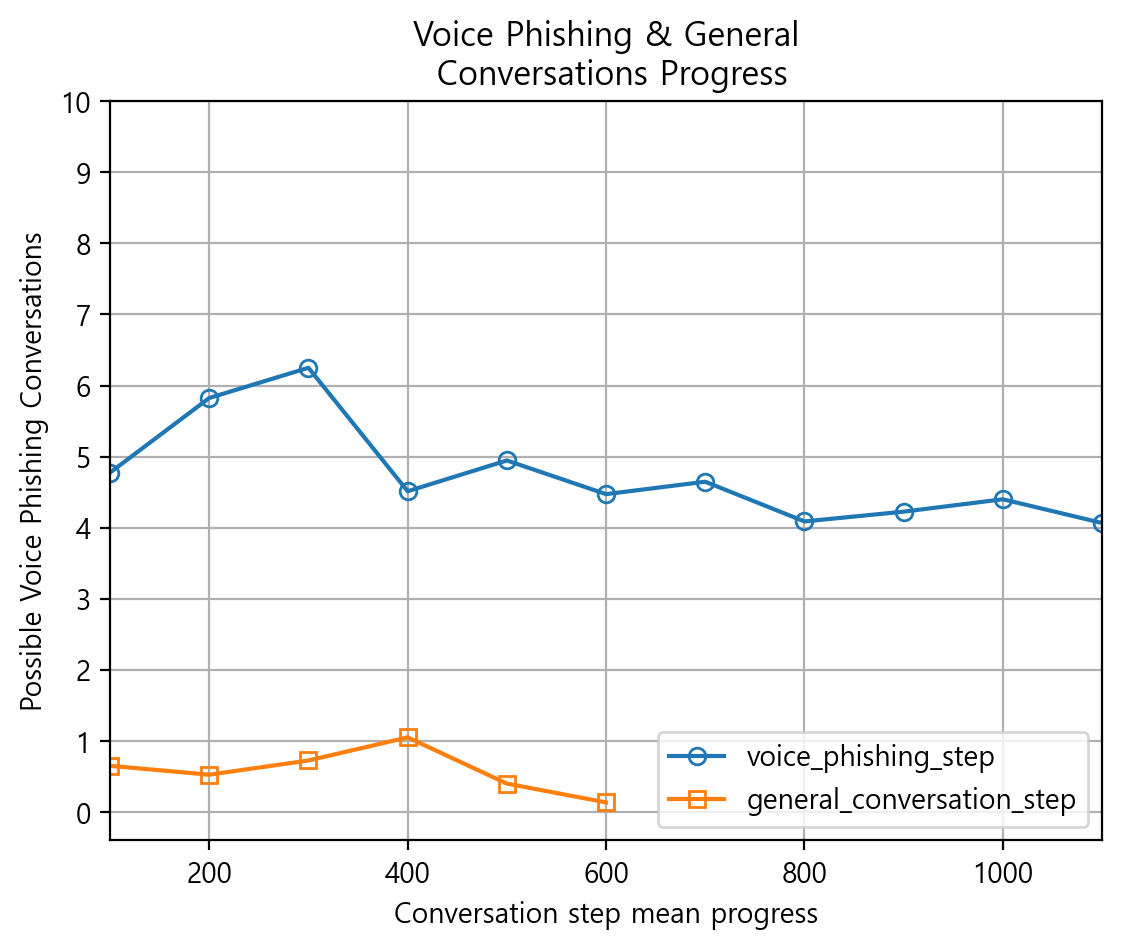

In [30]:
plt.plot(voice_phishing_step, voice_phishing_mean, marker="o", markerfacecolor='None', label='voice_phishing_step')
plt.plot(general_conversation_step, general_conversation_mean, marker="s", markerfacecolor='None', label='general_conversation_step')

plt.xlabel('Conversation step mean progress')
plt.ylabel('Possible Voice Phishing Conversations')
plt.title('Voice Phishing & General' +  '\n Conversations Progress')
plt.grid()
plt.legend(loc='lower right')
#plt.legend(bbox_to_anchor=(1.04, 1))
#plt.xticks(np.arange(100, 1100)) #x축 눈금 설정
plt.xlim([100, 1100]) #x축 범위 설정
plt.yticks(np.arange(0, 11)) #y축 눈금 설정
#plt.savefig('txt.png')
#plt.close()
plt.show()
plt.close()

In [31]:
#보이스 피싱 결측값 개수 step마다
print("보이스 피싱 step별 결측개수")
print(voice_phishing_null[0:20])

보이스 피싱 step별 결측개수
0      0
1      0
2      0
3      1
4      3
5      4
6      6
7      6
8      9
9     10
10    10
11    11
12    15
13    16
14    17
15    17
16    21
17    22
18    22
19    23
dtype: int64


In [32]:
#일반대화 결측값 개수 step마다
print("일반대화 step별 결측개수")
print(general_conversation_null[0:20])

일반대화 step별 결측개수
0     0
1     0
2     0
3     0
4     0
5     3
6    18
7    30
8    36
9    39
dtype: int64


In [33]:
#(general_conversation_False)
#print(general_conversation_denominator)

voice_phishing_False_percentage = 0
molecule = 0
denominator = 0
for i in range(len(voice_phishing_False)):
    molecule += voice_phishing_False[i]
    denominator += voice_phishing_denominator[i]

voice_phishing_False_check = (molecule / denominator) * 100
print("보이스피싱 대화 False 알람 확률: " + str(round(voice_phishing_False_check, 1)) + "%")

보이스피싱 대화 False 알람 확률: 59.2%


In [34]:
general_conversation_False_percentage = 0
molecule = 0
denominator = 0
for i in range(len(general_conversation_False)):
    molecule += general_conversation_True[i]
    denominator += general_conversation_denominator[i]

general_conversation_False_check = (molecule / denominator) * 100
print("일반 대화 False 알람 확률: " + str(round(general_conversation_False_check, 1)) + "%")

일반 대화 False 알람 확률: 5.1%


In [35]:
missed_general_conversation_sum = 0
for i in range(len(general_conversation_True)):
    if (general_conversation_True[i] > 0):
        missed_general_conversation_sum += 1
print("일반대화 중에 1번이라도 알람이 간 개수: ", missed_general_conversation_sum)

일반대화 중에 1번이라도 알람이 간 개수:  8


In [36]:
sns.set(font_scale=2)
confusion_matrix = []
confusion_matrix.append(voice_phishing_confusion_matrix)
confusion_matrix.append(general_conversation_confusion_matrix)

X_lable = ["VP", "Non-VP"]

df_cm = DataFrame(confusion_matrix, index=[i for i in X_lable],
                 columns= [i for i in X_lable])
df_cm

,VP,Non-VP
VP,38,2
Non-VP,5,35


In [37]:
recall_row = df2=df_cm.sum(axis=1) #  보이스피싱별 합 (즉  행의 합)
print(recall_row)

VP        40
Non-VP    40
dtype: int64


In [38]:
precision_column = df2=df_cm.sum(axis=0) #  보이스피싱별 합 (즉  행의 합)
print(precision_column)

VP        43
Non-VP    37
dtype: int64


In [39]:
VP = confusion_matrix[0][0]

In [40]:
recall = VP / recall_row[0]
print("Recall score = ", recall)

Recall score =  0.95


In [41]:
precision = VP / precision_column[0]
print("Precision score = ", precision)

Precision score =  0.8837209302325582


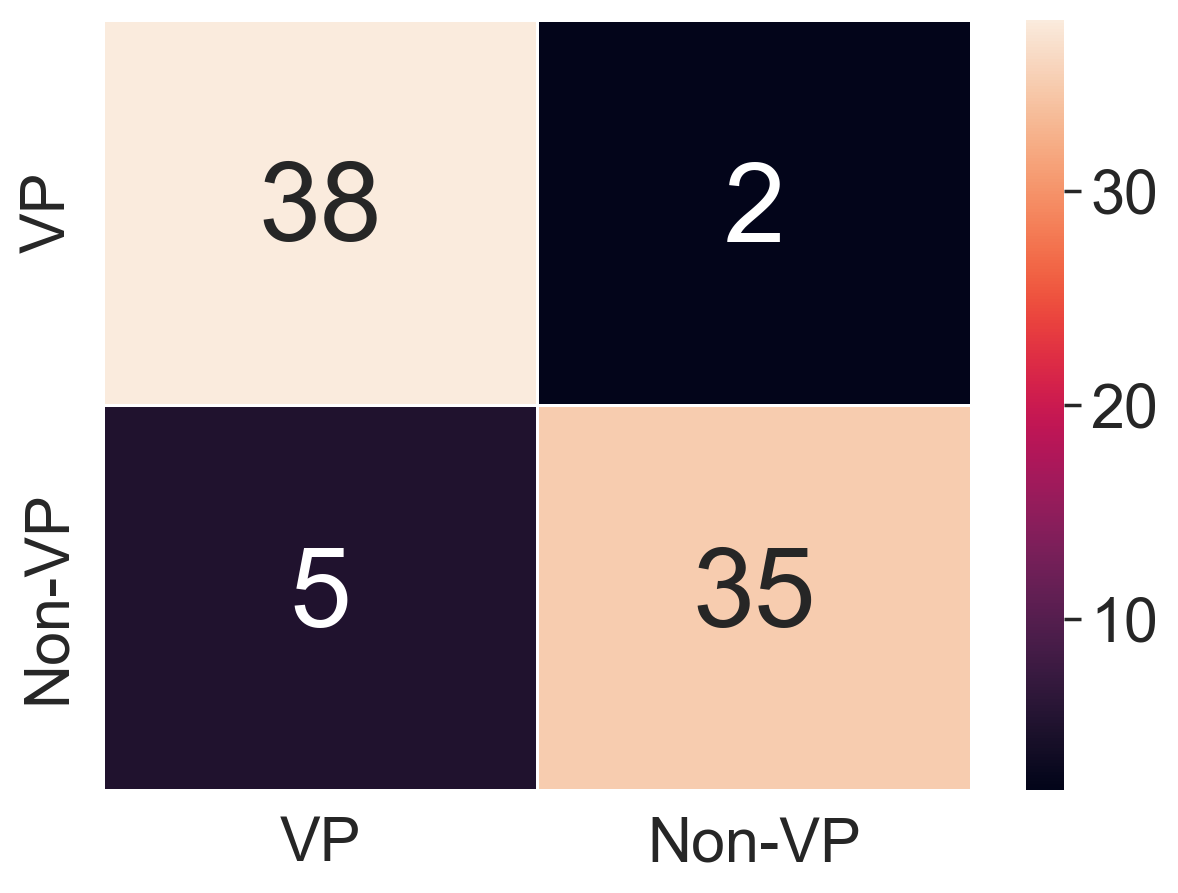

In [42]:
plt.figure(figsize = (7,5))
#plt.rc('font', size=25)        # 기본 폰트 크기
plt.rc('axes', labelsize=40)   # x,y축 label 폰트 크기
#plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
#plt.rc('ytick', labelsize=1)  # y축 눈금 폰트 크기
#plt.title('Voice Phishing & General' +  '\n Conversations Estimation')
sns.heatmap(df_cm, annot=True, fmt="d", 
            linewidths=.5, 
            annot_kws={"size": 40});

In [43]:
print("보이스피싱인데 보이스 피싱으로 분류된 파일: ", true_voice_phishing_tmp)

보이스피싱인데 보이스 피싱으로 분류된 파일:  ['01)은행연합회사칭_보안카드탈취시도_ATM기 앞으로 유도.txt', '02)시티캐피탈사칭.txt', '03)금감원 은행조사관 사칭 명의도용 사건.txt', '04)취업빙자 통장편취사기.txt', '05)입출금 가능한 계좌 임대 요청 (한달에 300만원).txt', '104)(피해자가 의심하자) 고객님께서 OO캐시에.txt', '109).txt', '11)이벤트행사 통장 한개당 300만원 제안.txt', '112).txt', '113).txt', '12)통장 임대 요청 (한달 임대료 250만원 드려요).txt', '120).txt', '126).txt', '13)신용관리 명목으로 비용을 요구.txt', '130).txt', '132).txt', '137).txt', '138).txt', '139).txt', '141).txt', '15)전산상 대출 가능조건을 만든다는 명목으로 선입금을 요구.txt', '155).txt', '161).txt', '165).txt', '17)구직사이트를 통해 대포통장을 개설하는 아르바이트 모집1.txt', '19)탈세를 명목으로 하여 통장을 양도하도록 유도.txt', '22)[대출빙자형 3] 은행을 사칭하면서 서민금융나들목 상품 명목의 대출을 안내.txt', '24)[대출빙자형 5] 사금융 대환대출 명목으로 피해자의 무통장입금 유도.txt', '26)[대출빙자형 7] 편법을 통해 피해자 신용평점을 상향시키기 위한 대출상환 요구-ⓑ.txt', '28)[대출빙자형 9] ARS로 대출안내를 신청한 피해자에게 대출상품을 안내해 줄 것처럼 속임.txt', '29)신한금융 사칭 대출권유.txt', '36)경매대행 업체를 사칭하여 대포통장 및 인출책 모집.txt', '40)음성안내에 대해 대출상담을 신청하자 시중은행을 사칭.txt', '50).txt', '51)기존 대출을 반환하시면 됩니다.txt', '56).txt', '66)대출을 위해서 신분증 사본과 3개월치 입출금 거래내역서를 보내주셔야 

In [44]:
print("보이스피싱인데 일반대화로 분류된 파일: ", flase_voice_phishing_tmp)

보이스피싱인데 일반대화로 분류된 파일:  ['61).txt', '84)고객님께서 저희 OO캐피탈로부터 대출을 받는다는 녹취를 진행하도록 하겠습니다. 동 내용으로 인해 유출 등의 문제 발생시 금감원에 손해배상청구소송을 진행하실 수 있습니다.txt']


In [45]:
print("일반대화인데 보이스 피싱으로 분류된 파일: ", true_general_conversation_tmp)

일반대화인데 보이스 피싱으로 분류된 파일:  ['25.txt', '50.txt', '60.txt', '61.txt', '70.txt']


In [46]:
print("일반대화인데 일반대화로 분류된 파일: ", false_general_conversation_tmp)

일반대화인데 일반대화로 분류된 파일:  ['01.txt', '02.txt', '03.txt', '04.txt', '05.txt', '11.txt', '14.txt', '15.txt', '17.txt', '18.txt', '20.txt', '21.txt', '24.txt', '26.txt', '28.txt', '29.txt', '30.txt', '31.txt', '33.txt', '38.txt', '39.txt', '41.txt', '43.txt', '44.txt', '48.txt', '52.txt', '54.txt', '55.txt', '56.txt', '59.txt', '62.txt', '64.txt', '69.txt', '72.txt', '74.txt']


In [47]:
f1_score = (2*recall*precision) / (recall+precision)
print("F1_score = " + str(round(f1_score, 2)))

F1_score = 0.92
